In [7]:
import numpy as np

import scipy as sp

import matplotlib.pyplot as plt

jtplot.style(figsize=(15, 9))

In [22]:
data.sf(x_0), data.isf(data.sf(x_0)), data.cdf(x_0), data.ppf(data.cdf(x_0))

(0.0477903522728147, 5.000000000000002, 0.9522096477271853, 5.000000000000002)

In [24]:
1 - data.cdf(x_0) # SF(x_0)

0.047790352272814696

Text(0.5, 1.0, 'ISF of Normal Distribution')

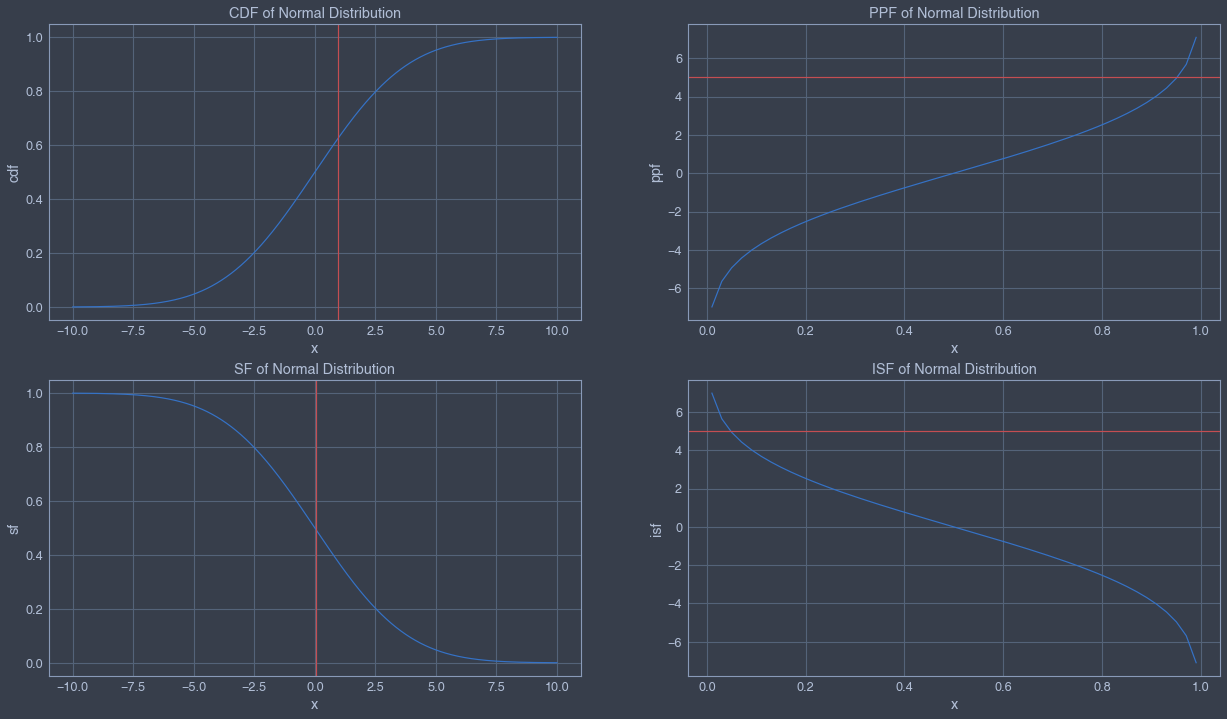

In [8]:
data = sp.stats.norm(0, 3)
x = np.linspace(-10, 10, 1_000)
x_0 = 5

fig, axs = plt.subplots(2, 2, figsize=(21, 12))

axs[0, 0].plot(x, data.cdf(x))
axs[0, 0].axvline(data.cdf(x_0), c='r')
axs[0, 0].set_xlabel('x')
axs[0, 0].set_ylabel('cdf')
axs[0, 0].set_title('CDF of Normal Distribution')

axs[0, 1].plot(x, data.ppf(x))
axs[0, 1].axhline(data.ppf(data.cdf(x_0)), c='r')
axs[0, 1].set_xlabel('x')
axs[0, 1].set_ylabel('ppf')
axs[0, 1].set_title('PPF of Normal Distribution')

axs[1, 0].plot(x, data.sf(x))
axs[1, 0].axvline(data.sf(x_0), c='r')
axs[1, 0].set_xlabel('x')
axs[1, 0].set_ylabel('sf')
axs[1, 0].set_title('SF of Normal Distribution')

axs[1, 1].plot(x, data.isf(x))
axs[1, 1].axhline(data.isf(data.sf(x_0)), c='r')
axs[1, 1].set_xlabel('x')
axs[1, 1].set_ylabel('isf')
axs[1, 1].set_title('ISF of Normal Distribution')

## Normality Test

Тесты:
 - Колмогорова-Смирнова (Kolmogorov-Smirnov test)
 - Колмогорова-Смирнова с поправкой Лиллиефорса (Lilliefors test)
 - Шапиро-Уилка (Shapiro-Wilk test)  
 -  Андерсона-Дарлинга (Anderson-Darling test)
 -  Крамера-Мизеса (Сramer-von Mises test) 
 -  на асимметричность и эксцессы (D’Agostino skewness test,  Anscombe-Glynn kurtosis test)
 - Харке-Бера (Jarque-Bera test)

### Data

In [3]:
np.random.seed(0)

In [4]:
log_normal = np.random.lognormal(0, 2, 1000)
normal = np.random.randn(1000)

In [36]:
def print_result(stat, pval):
    return f'statistic : {round(stat, 5)}, p-value: {round(pval, 5)}'

In [26]:
def h0_or_h1(pvalue):
    return 'HA' if pvalue < 0.01 else 'H0'

### Kolmogorov-Smirnov test

In [37]:
n_stat, n_pval = sp.stats.kstest(log_normal, 'norm')
stat, pval = sp.stats.kstest(normal, 'norm')
print_result(n_stat, n_pval), print_result(stat, pval)

('statistic : 0.5009, p-value: 0.0', 'statistic : 0.01926, p-value: 0.8449')

In [34]:
s, p = sp.stats.ks_2samp(normal, log_normal) # from the same distributions or not
print_result(s, p), h0_or_h1(p)

('statistic : 0.487 p-value: 0.0', 'HA')

In [38]:
s, p = sp.stats.ks_2samp(np.random.lognormal(0, 2, 1000), log_normal)
print_result(s, p), h0_or_h1(p)

('statistic : 0.028, p-value: 0.82822', 'H0')

In [39]:
s, p = sp.stats.ks_2samp(np.random.randn(1000), normal)
print_result(s, p), h0_or_h1(p)

('statistic : 0.033, p-value: 0.64781', 'H0')

### Lilliefors test

In [40]:
from statsmodels.stats.diagnostic import lilliefors

In [41]:
n_stat, n_pval = lilliefors(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.37576, p-value: 0.001', 'HA')

In [42]:
n_stat, n_pval = lilliefors(normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.01648, p-value: 0.79861', 'H0')

### Shapiro-Wilk test

In [45]:
n_stat, n_pval = sp.stats.shapiro(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

('statistic : 0.31343, p-value: 0.0', 'HA')

In [47]:
stat, pval = sp.stats.shapiro(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.99878, p-value: 0.74041', 'H0')

### Anderson-Darling test

In [49]:
from statsmodels.stats.diagnostic import normal_ad

In [50]:
n_stat, n_pval = normal_ad(log_normal)
print_result(n_stat, n_pval), h0_or_h1(n_pval)

f:\python\lib\site-packages\statsmodels\stats\_adnorm.py:70: RuntimeWarning: divide by zero encountered in log1p
  s = np.sum((2 * i[sl1] - 1.0) / nobs * (np.log(z) + np.log1p(-z[sl2])),


('statistic : inf, p-value: 0.0', 'HA')

In [51]:
stat, pval = normal_ad(normal)
print_result(stat, pval), h0_or_h1(pval)

('statistic : 0.28588, p-value: 0.62477', 'H0')

In [58]:
from statsmodels.stats.diagnostic import anderson_statistic

stat = anderson_statistic(normal)
stat

0.28587945679248605